In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import ray
import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.ddpg as ddpg
import seagul.envs
import numpy as np
from numpy import pi
import gym

/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sgillen/miniconda3/envs/ray/lib/python3.6/s

In [8]:
home_path = '/home/sgillen/work/'
checkpoint_path = home_path + \
"seagul/seagul/notebooks/humanoid_mesh/data/bench_model/PPO/PPO_Humanoid-v2_0_seed=0_2019-12-09_18-58-52_6vm_rr_/checkpoint_3649/checkpoint-3649"

In [9]:
# Some delightfully ugly python to infer where everything else is...
csv_path = '/'.join(checkpoint_path.split('/')[:-2]) + '/progress.csv'
save_name = checkpoint_path.split('/')[-3]
expr_file = "/experiment_state-" + save_name[-27:-8] + ".json"
expr_path = '/'.join(checkpoint_path.split('/')[:-3]) + expr_file

expr_data = json.load(open(expr_path))
config = expr_data['checkpoints'][-1]['config']
env_name = config['env']


df = pd.read_csv(csv_path)
#df

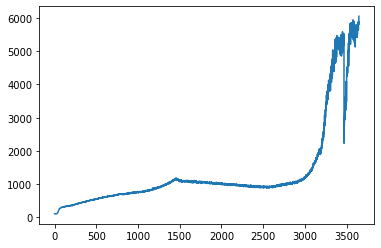

In [10]:
plt.plot(df['episode_reward_mean'])

In [11]:
ray.shutdown()
ray.init()

trainer = ppo.PPOTrainer(config)#, config['env_name'])
#trainer = ddpg.DDPGTrainer(config)
trainer.restore(checkpoint_path)

2019-12-10 19:30:38,587	INFO resource_spec.py:205 -- Starting Ray with 1.27 GiB memory available for workers and up to 0.64 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2019-12-10 19:30:39,446	INFO trainer.py:344 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2019-12-10 19:30:39,527	INFO rollout_worker.py:325 -- Could not seed torch
/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
2019-12-10 19:30:41,919	INFO rollout_worker.py:768 -- Built policy map: {'default_policy': <ray.rllib.policy.tf_policy_template.PPOTFPolicy object at 0x7f3c1b61c588>}
2019-12-10 19:30:41,920	INFO rollout_worker.py:769 -- Built preprocessor map: {'default_policy':

(pid=6962) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=6962)   _np_qint8 = np.dtype([("qint8", np.int8, 1)])
(pid=6962) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=6962)   _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
(pid=6962) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=6962)   _np_qint16 = np.dtype([("qint16"

/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


(pid=6949) 2019-12-10 19:30:45,423	INFO rollout_worker.py:325 -- Could not seed torch
(pid=6955) 2019-12-10 19:30:45,512	INFO rollout_worker.py:325 -- Could not seed torch
(pid=6950) 2019-12-10 19:30:45,603	INFO rollout_worker.py:325 -- Could not seed torch
(pid=6960) 2019-12-10 19:30:45,768	INFO rollout_worker.py:325 -- Could not seed torch
(pid=6962) 2019-12-10 19:30:45,883	INFO rollout_worker.py:325 -- Could not seed torch
(pid=6958) 2019-12-10 19:30:46,293	INFO rollout_worker.py:325 -- Could not seed torch
(pid=6959) 2019-12-10 19:30:46,361	INFO rollout_worker.py:325 -- Could not seed torch


/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


(pid=6963) 2019-12-10 19:30:46,501	INFO rollout_worker.py:325 -- Could not seed torch
(pid=6949) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
(pid=6949)   "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
(pid=6955) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
(pid=6955)   "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
(pid=6960) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
(pid=6960)   "Conver

2019-12-10 19:30:48,350	INFO trainable.py:358 -- Restored from checkpoint: /home/sgillen/work/seagul/seagul/notebooks/humanoid_mesh/data/bench_model/PPO/PPO_Humanoid-v2_0_seed=0_2019-12-09_18-58-52_6vm_rr_/checkpoint_3649/checkpoint-3649
2019-12-10 19:30:48,351	INFO trainable.py:365 -- Current state after restoring: {'_iteration': 3649, '_timesteps_total': 150503210, '_time_total': 74045.30070853233, '_episodes_total': 1111001}


In [17]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
%matplotlib inline

#env = gym.make(env_name)
#env.unwrapped.reset_model = det_reset_model

env = gym.make("det_humanoid-v1")
env._max_episode_steps = 10000
obs = env.reset()

action_hist = []
m_act_hist = []
state_hist  = []
obs_hist = []
reward_hist = []

done = False

#np.random.seed(0)
#random.seed(0)
#tf.set_random_seed(0)

#with trainer.get_policy().get_session():

while not done:
    #actions = trainer.compute_action(obs.flatten())
    sampled_actions, _ , out_dict = trainer.compute_action(obs.flatten(),full_fetch=True)
    mean_actions = out_dict['behaviour_logits'][:17]
    obs, reward, done, _ = env.step(np.asarray(mean_actions))
    action_hist.append(np.copy(mean_actions))
    obs_hist.append(np.copy(obs))
    reward_hist.append(np.copy(reward))

    if done:
        break

print(sum(reward_hist))
print(len(obs_hist))
#plt.plot(action_hist)
#plt.figure()
#plt.figure()
#plt.plot(obs_hist)
#plt.figure()
    

42654.68533540196
7038


In [ ]:
# Reminder that the bahavior logits that come out are the mean and logstd (not log mean, despite the name logit)
trainer.compute_action(obs, full_fetch=True)